In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')
data.shape

(42000, 785)

In [ ]:

data = np.array(data)
m, n = data.shape
m,n # this tells us there are 42000 images each of size 28x28 pixels

np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0 # normalize pixel values (feature scaling) to be between 0 and 1
#In the raw MNIST data, each pixel is represented by a number from 0 to 255 
# (where 0 is black and 255 is white). We divide by 255 to normalize the data 
# so that every pixel value falls between 0 and 1.
data_dev

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0 # normalize pixel values (feature scaling) to be between 0 and 1


(array([8, 0, 0, ..., 2, 8, 6], shape=(41000,)),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(784, 41000)))

In [ ]:
def init_params(): #initialize parameters for the 2-layer neural network (hidden and output layers)
    W1 = np.random.rand(10, 784) - 0.5#hidden layer weights
    b1 = np.random.rand(10, 1) - 0.5 #hidden layer bias
    W2 = np.random.rand(10, 10) - 0.5#output layer weights
    b2 = np.random.rand(10, 1) - 0.5#output layer bias
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0) #activation function ReLU

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z)) #activation function softmax for output layer
    #it basically takes output and converts it into probabilities that sum to 1
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1  #linear combination for hidden layer, matrix multiplication
    A1 = ReLU(Z1)#activation for hidden layer
    Z2 = W2.dot(A1) + b2#linear combination for output layer, matrix multiplication
    A2 = softmax(Z2)#activation for output layer
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0 #derivative of ReLU activation function to be used in backpropagation Z < 0 always → output = 0 → no gradient

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))# create a matrix of zeros with shape (number of examples, number of classes)
    one_hot_Y[np.arange(Y.size), Y] = 1# set the appropriate elements to 1 for one-hot encoding
    one_hot_Y = one_hot_Y.T# transpose so that each column represents one example
    return one_hot_Y# one-hot encoded matrix mainly used for calculating loss and gradients during backpropagation

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)# one-hot encode the true labels
    dZ2 = A2 - one_hot_Y # gradient of loss with respect to Z2 (output layer pre-activation) 
    dW2 = 1 / m * dZ2.dot(A1.T) # gradient of loss with respect to W2 (output layer weights)
    db2 = 1 / m * np.sum(dZ2) # gradient of loss with respect to b2 (output layer bias)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)# gradient of loss with respect to Z1 (hidden layer pre-activation)
    dW1 = 1 / m * dZ1.dot(X.T)# gradient of loss with respect to W1 (hidden layer weights)
    db1 = 1 / m * np.sum(dZ1)# gradient of loss with respect to b1 (hidden layer bias)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1   #update weights and biases using gradient descent
    b1 = b1 - alpha * db1    #update weights and biases using gradient descent
    W2 = W2 - alpha * dW2   #update weights and biases using gradient descent
    b2 = b2 - alpha * db2    #update weights and biases using gradient descent
    return W1, b1, W2, b2

In [53]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [55]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)



Iteration:  0
[5 4 1 ... 7 1 5] [8 0 0 ... 2 8 6]
0.11131707317073171
Iteration:  10
[2 9 1 ... 4 8 2] [8 0 0 ... 2 8 6]
0.19309756097560976
Iteration:  20
[2 9 7 ... 4 8 2] [8 0 0 ... 2 8 6]
0.2940731707317073
Iteration:  30
[8 9 7 ... 4 8 8] [8 0 0 ... 2 8 6]
0.34014634146341466
Iteration:  40
[8 9 0 ... 4 8 8] [8 0 0 ... 2 8 6]
0.3813170731707317
Iteration:  50
[8 9 0 ... 4 8 8] [8 0 0 ... 2 8 6]
0.42446341463414633
Iteration:  60
[8 9 0 ... 4 8 8] [8 0 0 ... 2 8 6]
0.4621219512195122
Iteration:  70
[8 0 0 ... 4 8 2] [8 0 0 ... 2 8 6]
0.49817073170731707
Iteration:  80
[8 0 0 ... 6 8 2] [8 0 0 ... 2 8 6]
0.530829268292683
Iteration:  90
[8 0 0 ... 6 8 2] [8 0 0 ... 2 8 6]
0.5616585365853659
Iteration:  100
[8 0 0 ... 6 8 6] [8 0 0 ... 2 8 6]
0.5901951219512195
Iteration:  110
[8 0 0 ... 6 8 6] [8 0 0 ... 2 8 6]
0.6152439024390244
Iteration:  120
[8 0 0 ... 6 8 6] [8 0 0 ... 2 8 6]
0.6373658536585366
Iteration:  130
[8 0 0 ... 6 8 6] [8 0 0 ... 2 8 6]
0.657829268292683
Iteration:  14

In [58]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


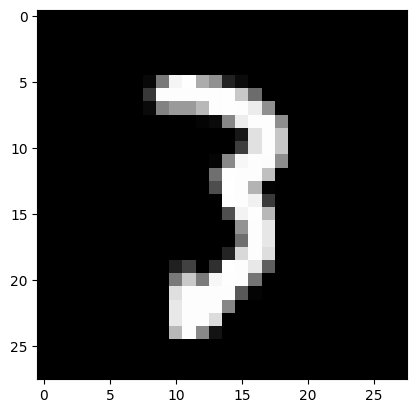

In [60]:

test_prediction(45, W1, b1, W2, b2)